In [ ]:
#run and restart runtime
!pip install matplotlib==3.4.1
!pip install celluloid
!apt install ffmpeg

In [ ]:
import numpy as np 
import matplotlib 
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
from celluloid import Camera
from IPython.display import HTML

print (matplotlib.__version__)

3.4.1


In [ ]:
#Initial palette
palette = sns.color_palette('bright')
palette

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

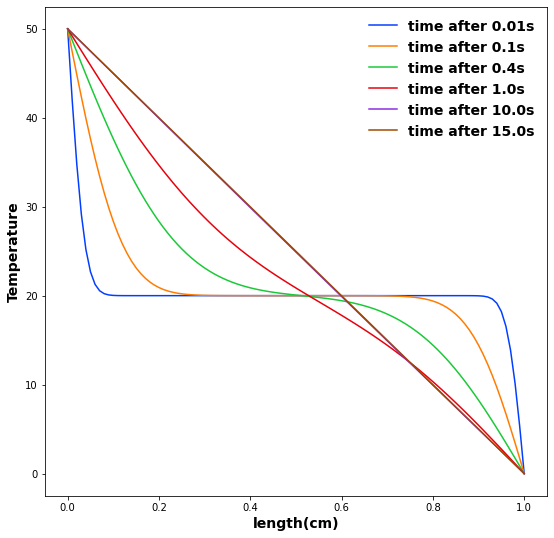

In [ ]:
## FTCS METHOD
#graph setting
fig = plt.figure(figsize=(9,9))
legend_properties = {'weight':'bold','size':'14'}

#constants
L = 0.01
D = 4.25e-6
N = 100
a = L/N
h = 1e-4
epsilon = h/1000
factor = h*D/a/a
#initial values
T_low = 0.0
T_mid = 20.0
T_high = 50.0
#temperature container
T = np.empty(N+1,float)
temp = np.empty(N+1,float)
#set value in container
T[0],T[N] = T_high, T_low
temp[0],temp[N] = T_high, T_low
T[1:N] = T_mid
#the time which I want to plot 
plot_t = [0.01, 0.1,0.4,1.0,10.0,15.0]
t_end = plot_t[-1] + epsilon
time_index = 0 
t = 0.0     #timer
plot_i = 0  #plot_timer

while t< t_end:
    temp[1:N] = T[1:N] + factor*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T, temp =temp, T
    time_index += 1 
    t = h*time_index
    if t<t_end and abs(t-plot_t[plot_i])<epsilon:
        plot_i += 1
        plt.plot(np.linspace(0,1,101),T,label=f'time after {t}s',color = palette[plot_i-1])

plt.legend(loc='best',frameon=False, prop=legend_properties)
plt.xlabel('length(cm)', fontsize = 14, fontweight='bold',loc='center')
plt.ylabel('Temperature',rotation=90, fontsize = 14, fontweight='bold',loc='center')
plt.savefig('wow1D',dpi=300,bbox_inches='tight')
plt.show()     

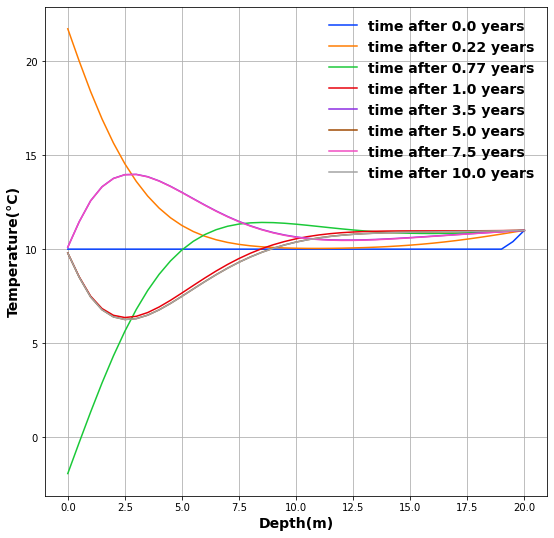

In [ ]:
## FTCS METHOD
#graph setting
fig = plt.figure(figsize=(9,9))
legend_properties = {'weight':'bold','size':'14'}

#constants
L = 20              #m
D = 0.1             #m^2/Day
N = 40            #grid number
a = L/N             #grid spacing
h = 1               #day
epsilon = h/1000
factor = h*D/a/a
#initial values
T_earth = 10       #Celcius
T_mid = 10
T_inner = 11
#temperature container
T = np.empty(N+1,float)
temp = np.empty(N+1,float)
T[0],T[N] = T_earth, T_inner
temp[0],temp[N] = T_earth, T_inner
T[1:N] = T_mid
#the time which I want to plot 
plot_t = [1,80,280,365*1,365*3+183,365*5,365*7+183,3650]   #days..
t_end = plot_t[-1] + epsilon

time_index = 0 
t = 0.0     #timer
plot_i = 0  #plot_timer

surface = []
while t< t_end:
    surface.append(10 + 12*np.sin(2*np.pi*t/365))
    T[0]= 10 + 12*np.sin(2*np.pi*t/365)
    temp[0]= 10 + 12*np.sin(2*np.pi*t/365)

    temp[1:N] = T[1:N] + factor*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T, temp =temp, T
    time_index += 1 

    t = time_index
    
    if t<t_end and abs(t-plot_t[plot_i])<epsilon:
        plot_i += 1
        plt.plot(np.linspace(0,20,41),T,label=f'time after {round(t/365,2)} years',color = palette[plot_i-1])

plt.legend(loc='best',frameon=False, prop=legend_properties)
plt.xlabel('Depth(m)', fontsize = 14, fontweight='bold',loc='center')
plt.ylabel('Temperature(°C)',rotation=90, fontsize = 14, fontweight='bold',loc='center')
plt.savefig('wow Earth crust',dpi=300,bbox_inches='tight')
plt.grid()
plt.show()     


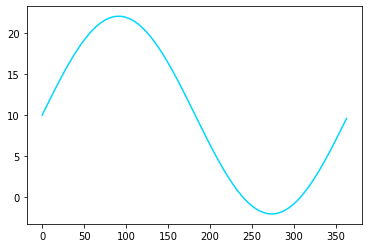

In [ ]:
plt.plot(surface[:364],label='surface',color=palette[9])
plt.show()

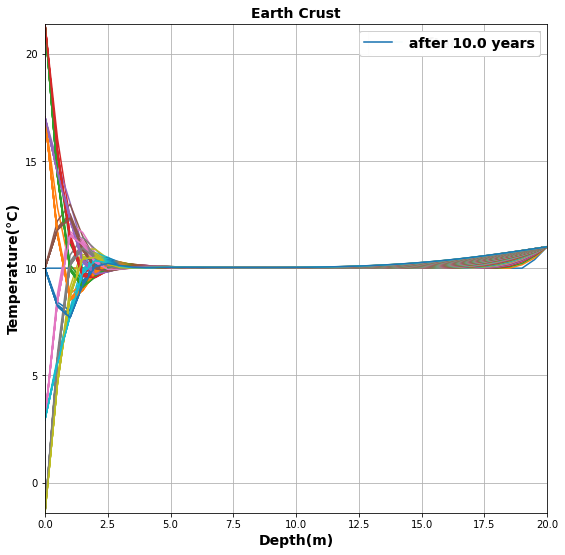

In [ ]:
## FTCS METHOD
#graph setting
fig = plt.figure(figsize=(9,9))
legend_properties = {'weight':'bold','size':'14'}

plt.grid()
camera = Camera(fig) #for animate

#constants
L = 20              #m
D = 0.1             #m^2/Day
N = 40            #grid number
a = L/N             #grid spacing
h = 1               #day
epsilon = h/1000
factor = h*D/a/a
#initial values
T_earth = 10       #Celcius
T_mid = 10
T_inner = 11
#temperature container
T = np.empty(N+1,float)
temp = np.empty(N+1,float)
T[0],T[N] = T_earth, T_inner
temp[0],temp[N] = T_earth, T_inner
T[1:N] = T_mid
#the time which I want to plot 
for t in np.arange(0,3651,36.5):    
    T[0]= 10 + 12*np.sin(2*np.pi*t/365)
    temp[0]= 10 + 12*np.sin(2*np.pi*t/365)
    temp[1:N] = T[1:N] + factor*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T, temp =temp, T
    Plot = plt.plot(np.linspace(0,20,41),T)
    plt.legend(Plot, [f' after {t/365} years'],prop=legend_properties)
    plt.autoscale(tight=True)
    plt.title("Earth Crust", fontsize = 14, fontweight='bold',loc='center')
    plt.xlabel('Depth(m)', fontsize = 14, fontweight='bold',loc='center')
    plt.ylabel('Temperature(°C)',rotation=90, fontsize = 14, fontweight='bold',loc='center')
    camera.snap()

In [ ]:
animation = camera.animate(interval=100, repeat=True, blit=True)

In [ ]:
HTML(animation.to_html5_video())

In [ ]:
animation.save(
    'Earth Crust final.mp4',
    dpi=300,
    savefig_kwargs={
        'frameon': False,
        'pad_inches': 'tight'
    }
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  


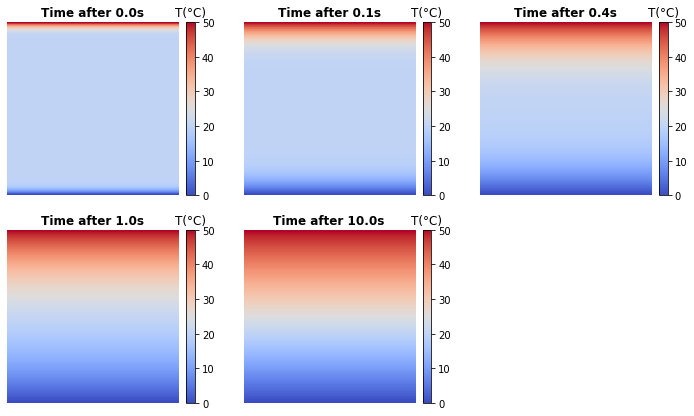

In [ ]:
## FTCS METHOD
#graph setting
fig = plt.figure(figsize=(12,7))
legend_properties = {'weight':'bold','size':'14'}

#constants
L = 0.01
D = 4.25e-6
N = 100
a = L/N
h = 1e-4
epsilon = h/1000
factor = h*D/a/a
#initial values
T_low = 0.0
T_mid = 20.0
T_high = 50.0
#temperature container
T = np.empty(N+1,float)
temp = np.empty(N+1,float)
#set value in container
T[0],T[N] = T_high, T_low
temp[0],temp[N] = T_high, T_low
T[1:N] = T_mid
#the time which I want to plot 
plot_t = [0.01, 0.1,0.4,1.0,10.0]
t_end = plot_t[-1] + epsilon
time_index = 0 
t = 0.0     #timer
plot_i = 0  #plot_timer

while t< t_end:
    temp[1:N] = T[1:N] + factor*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T, temp =temp, T
    time_index += 1 
    t = h*time_index
    if t<t_end and abs(t-plot_t[plot_i])<epsilon:
        plot_i += 1
        ax = fig.add_subplot(2,3,plot_i)
        im = ax.imshow((np.tile(T,(100,1))).T,cmap='coolwarm')
        clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
        clb.ax.set_title('T(°C)')
        ax.set_title(f'Time after {round(t,1)}s',fontweight='bold')
        ax.axis('off')
plt.tight_layout
plt.savefig('wow',dpi=300,bbox_inches='tight')
plt.show()     

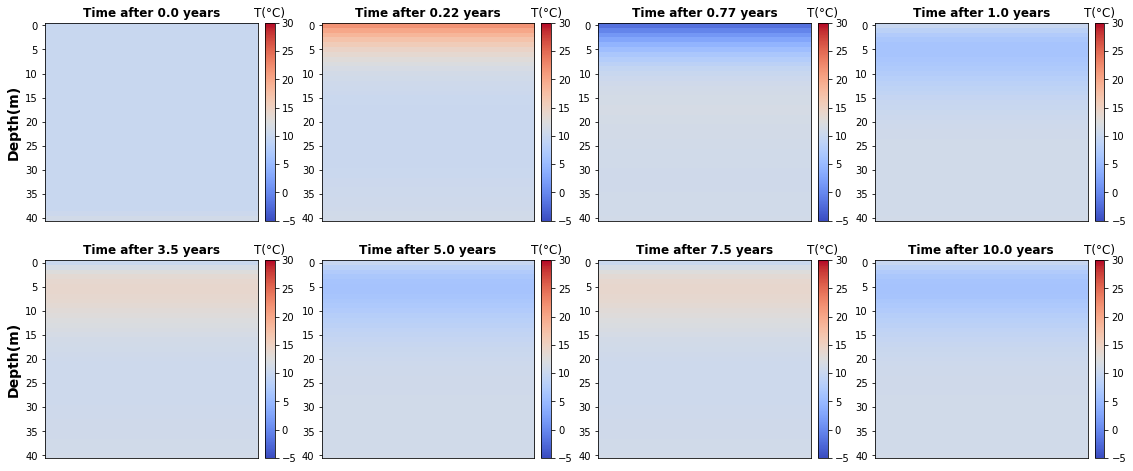

In [ ]:
## FTCS METHOD
#graph setting
fig = plt.figure(figsize=(19,8))
legend_properties = {'weight':'bold','size':'14'}

#constants
L = 20              #m
D = 0.1             #m^2/Day
N = 40            #grid number
a = L/N             #grid spacing
h = 1               #day
epsilon = h/1000
factor = h*D/a/a
#initial values
T_earth = 10       #Celcius
T_mid = 10
T_inner = 11
#temperature container
T = np.empty(N+1,float)
temp = np.empty(N+1,float)
T[0],T[N] = T_earth, T_inner
temp[0],temp[N] = T_earth, T_inner
T[1:N] = T_mid
#the time which I want to plot 
plot_t = [1,80,280,
          365*1,365*3+183,365*5,
          365*7+183,3650]   #days..
t_end = plot_t[-1] + epsilon

time_index = 0 
t = 0.0     #timer
plot_i = 0  #plot_timer

while t< t_end:
    T[0]= 10 + 12*np.sin(2*np.pi*t/365)
    temp[0]= 10 + 12*np.sin(2*np.pi*t/365)

    temp[1:N] = T[1:N] + factor*(T[0:N-1]+T[2:N+1]-2*T[1:N])
    T, temp =temp, T
    time_index += 1 
    t = time_index
    
    if t<t_end and abs(t-plot_t[plot_i])<epsilon:
        plot_i += 1
        ax = fig.add_subplot(2,4,plot_i)
        im = ax.imshow((np.tile(T,(50,1))).T,cmap='coolwarm',vmin=-5,vmax=30,aspect='auto')
        if plot_i==1 or plot_i==5:
            ax.set_ylabel('Depth(m)', fontsize = 14, fontweight='bold',loc='center')
        clb = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.03)
        clb.ax.set_title('T(°C)')
        ax.set_title(f'Time after {round(t/365,2)} years',fontweight='bold')
        ax.set_xticks([])

plt.savefig('wwoww',dpi=300,bbox_inches='tight')
plt.show()     
